In [18]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from utils import *

In [2]:
# Define a function to return some characteristics of the dataset
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    # Define a key "image_shape" and store the test image shape 3-tuple
    notcar_image = mpimg.imread(notcar_list[0])
    data_dict["image_shape"] = notcar_image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = notcar_image.dtype
    # Return data_dict
    return data_dict

In [12]:
cars = []
notcars = []

extra_notcars_images = glob.glob('dataset/non-vehicles/Extras/*.png')
for image in extra_notcars_images:
    notcars.append(image)
    
gti_notcars_images = glob.glob('dataset/non-vehicles/GTI/*.png')
for image in gti_notcars_images:
    notcars.append(image)
    

gti_far_cars_images = glob.glob('dataset/vehicles/GTI_Far/*.png')
for image in gti_far_cars_images:
    cars.append(image)
    
gti_left_cars_images = glob.glob('dataset/vehicles/GTI_Left/*.png')
for image in gti_left_cars_images:
    cars.append(image)
    
gti_middleclose_cars_images = glob.glob('dataset/vehicles/GTI_MiddleClose/*.png')
for image in gti_middleclose_cars_images:
    cars.append(image)
    
gti_right_cars_images = glob.glob('dataset/vehicles/GTI_Right/*.png')
for image in gti_right_cars_images:
    cars.append(image)
    
kitti_cars_images = glob.glob('dataset/vehicles/KITTI_extracted/*.png')
for image in kitti_cars_images:
    cars.append(image)
    
data_info = data_look(cars, notcars)

print('Your function returned a count of',
      data_info["n_cars"], ' cars and',
      data_info["n_notcars"], ' non-cars')
print('of size: ', data_info["image_shape"], ' and data type:',
      data_info["data_type"])

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


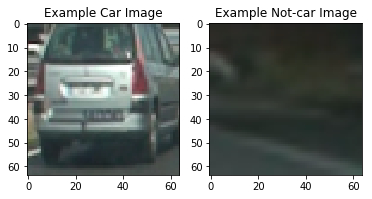

In [26]:
# Just for fun choose random car / not-car indices and plot example images
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')